# COVID-19 EDA/TRACKING

This notebook pulls current COVID-19 data from different sources. I explore and plot the data.        

In [258]:
# load packages
from pycovid import pycovid
import pandas as pd
import os
import datetime
from datetime import date, timedelta
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set working file
os.chdir('/Users/rachelmartonik/covid')

pd.set_option('display.max_rows', 500)

# pycovid package

Using the pycovid package to pull raw data from the Johns Hopkins University Center for Systems Science and Engineering (JHU CCSE) Coronavirus.

Reference:https://github.com/sudharshan-ashok/pycovid

In [169]:
# pycovid function to map countries

# pip install pycovid
pycovid.plot_countries()

In [140]:
# Load data
data = pycovid.getCovidCases()

In [141]:
data.head()

,province_state,country_region,lat,long,date,cases,type,name,alpha-3
0,NaN,Afghanistan,33.0,65.0,2020-01-22,0,confirmed,Afghanistan,AFG
1,NaN,Afghanistan,33.0,65.0,2020-01-23,0,confirmed,Afghanistan,AFG
2,NaN,Afghanistan,33.0,65.0,2020-01-24,0,confirmed,Afghanistan,AFG
3,NaN,Afghanistan,33.0,65.0,2020-01-25,0,confirmed,Afghanistan,AFG
4,NaN,Afghanistan,33.0,65.0,2020-01-26,0,confirmed,Afghanistan,AFG


In [142]:
data.country_region.value_counts()

Canada                              1664
France                              1280
Australia                           1024
Netherlands                          512
Denmark                              384
Cyprus                               128
Mexico                               128
Belarus                              128
Japan                                128
Libya                                128
Timor-Leste                          128
Singapore                            128
Slovenia                             128
Senegal                              128
Oman                                 128
Equatorial Guinea                    128
Central African Republic             128
Benin                                128
Mali                                 128
Angola                               128
Bahrain                              128
Costa Rica                           128
Cameroon                             128
Uruguay                              128
Kazakhstan      

In [143]:
# create US only data set
us = data[data['name'] == "US"]

In [144]:
# Or you could just use the package filters to do all this!
data2 = pycovid.getCovidCasesWide(countries = ['US'], cumsum=True)
data2.head()

,date,country_region,confirmed,death,recovered,name,alpha-3
0,2020-01-22,US,1,0,0,US,USA
1,2020-01-23,US,1,0,0,US,USA
2,2020-01-24,US,2,0,0,US,USA
3,2020-01-25,US,2,0,0,US,USA
4,2020-01-26,US,5,0,0,US,USA


In [274]:
data3 = pd.melt(data2, id_vars=['date'], value_vars=['confirmed', 'death', 'recovered'])
data3.head()

,date,variable,value
0,2020-01-22,confirmed,1
1,2020-01-23,confirmed,1
2,2020-01-24,confirmed,2
3,2020-01-25,confirmed,2
4,2020-01-26,confirmed,5


In [147]:

fig = px.line(data3, x="date", y="value", color='variable')
fig.show()

# Daily US data
## State level data - focus on Virginia

https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

US Cumulative cases by place. Updated daily. Started 3/22.

In [233]:
# Create "date of analysis" variable to be yesterday's date so data is current to that date no matter when it is pulled
yesterday = date.today() - timedelta(1)
print (yesterday)
year = str(yesterday.year)
month = str(yesterday.month)
month = '0'+month
day = str(yesterday.day)

print(year)
print(month)
print(day)

date_of_analysis = month+ '-' + day + '-' + year
print (date_of_analysis)

2020-03-27
2020
03
27
03-27-2020


In [275]:
# Use date_of_analysis for url variable for daily use
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+ date_of_analysis + '.csv'
us_data = pd.read_csv(url, error_bad_lines=False)

In [237]:
# US data set
us_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-27 22:14:55,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-27 22:14:55,30.295065,-92.414197,8,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-27 22:14:55,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-27 22:14:55,43.452658,-116.241552,54,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-27 22:14:55,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [239]:
# Virginia data set
va = us_data[us_data['Province_State']== 'Virginia']
va.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2,51001.0,Accomack,Virginia,US,2020-03-27 22:14:55,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
29,51003.0,Albemarle,Virginia,US,2020-03-27 22:14:55,38.020807,-78.554811,8,0,0,0,"Albemarle, Virginia, US"
36,51510.0,Alexandria,Virginia,US,2020-03-27 22:14:55,38.814003,-77.081831,18,0,0,0,"Alexandria, Virginia, US"
44,51005.0,Alleghany,Virginia,US,2020-03-27 22:14:55,37.786361,-80.002225,0,0,0,0,"Alleghany, Virginia, US"
55,51007.0,Amelia,Virginia,US,2020-03-27 22:14:55,37.340810,-77.985846,1,0,0,0,"Amelia, Virginia, US"


In [276]:
# Number of confirmed, death, and recovered cases in Virginia as of today:
conf_total = va['Confirmed'].sum()
deaths_total = va['Deaths'].sum()
recovered_total = va['Recovered'].sum()

print(f"{conf_total} confirmed cases in VA as of {date_of_analysis}.")
print(f"{deaths_total} deaths cases in VA as of {date_of_analysis}.")
print(f"{recovered_total} recovered cases in VA as of {date_of_analysis}.")

607 confirmed cases in VA as of 03-27-2020.
10 deaths cases in VA as of 03-27-2020.
0 recovered cases in VA as of 03-27-2020.


In [277]:
(va['Confirmed']).describe()
# 3/27 Fairfax county with highest count at 124
# Mean confirmed cases of 4.5

count    133.000000
mean       4.563910
std       14.222983
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max      124.000000
Name: Confirmed, dtype: float64

In [278]:
(va['Deaths']).describe()
# As of 3/27 still very few deaths in VA

count    133.000000
mean       0.075188
std        0.316804
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: Deaths, dtype: float64

In [271]:
va_sorted = va.sort_values(by = 'Confirmed', ascending=False)
va_sorted.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
898,51059.0,Fairfax,Virginia,US,2020-03-27 22:14:55,38.836776,-77.275658,124,1,0,0,"Fairfax, Virginia, US"
83,51013.0,Arlington,Virginia,US,2020-03-27 22:14:55,38.876767,-77.101399,63,0,0,0,"Arlington, Virginia, US"
1387,51095.0,James City,Virginia,US,2020-03-27 22:14:55,37.311570,-76.769506,55,2,0,0,"James City, Virginia, US"
2348,51153.0,Prince William,Virginia,US,2020-03-27 22:14:55,38.709162,-77.487137,44,0,0,0,"Prince William, Virginia, US"
1718,51107.0,Loudoun,Virginia,US,2020-03-27 22:14:55,39.089901,-77.634819,43,1,0,0,"Loudoun, Virginia, US"


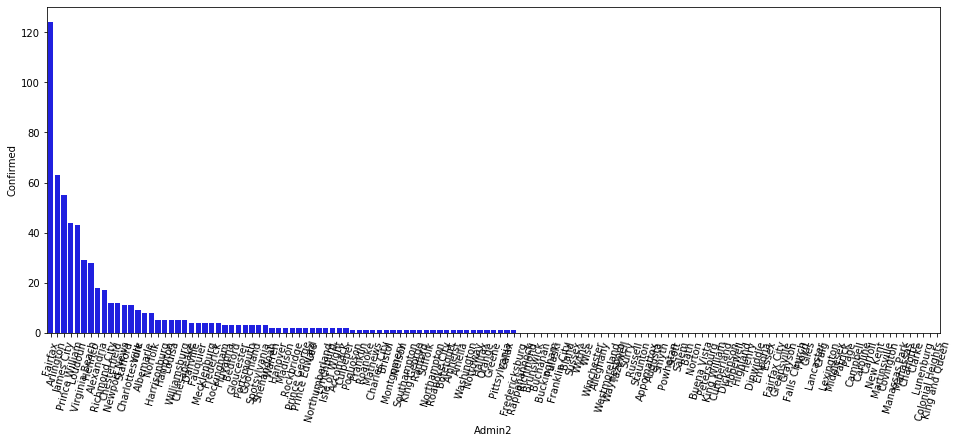

In [273]:
# Look at the job titles with a frequency greater than 5
import seaborn as sns
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Admin2", y="Confirmed", data=va_sorted, color="b")
plt.setp(ax.get_xticklabels(), rotation=75);

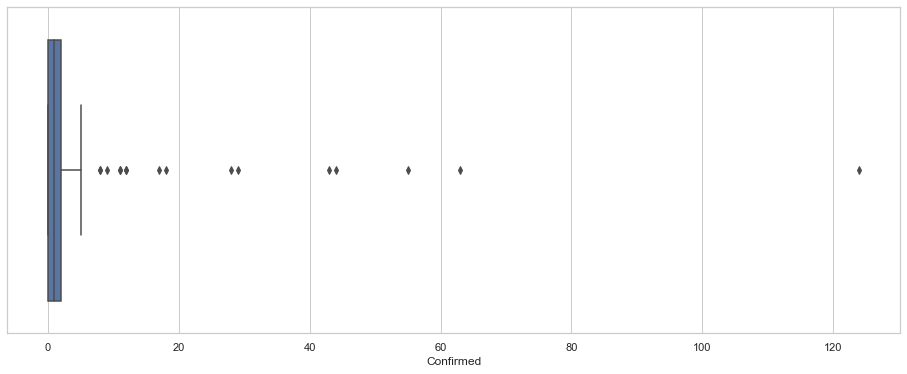

In [345]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(x=va["Confirmed"])

 # Johns Hopkins Global Data:
 
 - Dataset: 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
 - Format: Comma-Separated Values (CSV) – Opens in Excel, Google Docs, etc
 - Dataset contains the number of confirmed cases, number of recoveries, and number of deaths for every country, listed by the cumulative count for each day since Jan. 18, 2020. 
 
 - Link: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [208]:
# Read in three files
import pandas as pd
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recovered = pd.read_csv(url, error_bad_lines=False)

In [347]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [217]:
# Create "date of analysis" variable to be yesterday's date so data is current to that date no matter when it is pulled
yesterday = date.today() - timedelta(1)
print (yesterday)
year = '20'
month = str(yesterday.month)
day = str(yesterday.day)

date_of_analysis = month+ '/' + day + '/' + year
print (date_of_analysis)

2020-03-27
3/27/20


In [214]:
# Number of confirmed, death, and recovered cases as of today:
conf_total = confirmed[date_of_analysis].sum()
deaths_total = deaths[date_of_analysis].sum()
recovered_total = recovered[date_of_analysis].sum()

print(f"{conf_total} confirmed cases as of {date_of_analysis}.")
print(f"{deaths_total} deaths cases as of {date_of_analysis}.")
print(f"{recovered_total} recovered cases as of {date_of_analysis}.")

593291 confirmed cases as of 3/27/20.
27198 deaths cases as of 3/27/20.
130915 recovered cases as of 3/27/20.


compare to map: https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

In [341]:
confirmed['Country/Region'].value_counts() # some countries have r

China                               33
Canada                              15
France                              10
Australia                            8
United Kingdom                       7
Netherlands                          4
Denmark                              3
Greece                               1
Hungary                              1
Qatar                                1
Czechia                              1
Burma                                1
Timor-Leste                          1
Andorra                              1
Turkey                               1
Algeria                              1
Iraq                                 1
Portugal                             1
Diamond Princess                     1
India                                1
Afghanistan                          1
Azerbaijan                           1
Mauritius                            1
Croatia                              1
Slovenia                             1
Uzbekistan               

In [393]:
china = confirmed[confirmed['Country/Region'] == "China"]
china.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,469,480,491,504,522,537,558,561,566,569
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,577,578,578,578,578,578
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,299,303,313,313,318,322,328,331
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,133,134,134,134,136,136,136,136,136,136


In [350]:
# Group data by country/region to collapse China and others
confirmed_collapsed = confirmed.groupby('Country/Region')
confirmed_collapsed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,1,1,1,1,3,3,3,7,7
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,79,97,128,158,266,301,387,387,502,589
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,84,115,136,160,194,235,249,265,290,329
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,3,4,6,9,19,32,39,39,53,62
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,267,307,353,436,669,669,818,1029,1219,1405


In [394]:
a= confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)
b = a.groupby(["Country/Region"], as_index=False).sum()
b.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,Albania,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,Algeria,0,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,Andorra,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [360]:
confirmed_values = b.drop(['Country/Region'], axis=1)
date_vars = list(confirmed_values.columns) 


In [363]:
data_for_plot = pd.melt(b, id_vars=['Country/Region'], value_vars=date_vars)
data_for_plot.head()

,Country/Region,variable,value
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [365]:
china = data_for_plot[data_for_plot['Country/Region'] == "China"]
china.head()

,Country/Region,variable,value
34,China,1/22/20,548
210,China,1/23/20,643
386,China,1/24/20,920
562,China,1/25/20,1406
738,China,1/26/20,2075


In [392]:
data_for_plot = data_for_plot[data_for_plot['value'] > 5] # Remove countries with no confirmed cases
fig = px.line(data_for_plot, x="variable", y="value", color='Country/Region', width=1100, height=800)
fig.update_layout(
    title=(f"Confirmed Covid-19 cases as of {date_of_analysis}"),
    xaxis_title="Confirmed Cases",
    yaxis_title="Date",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"))
fig.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig.show(filename='legend-names')